**LOAD THE DATA**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv('Retail Sales Analysis_utf.csv' , encoding= 'unicode_escape')
#to avoid encoding error, use 'unicode_escape'

In [12]:
df.shape

(2000, 11)

In [132]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,order_value_raw,month,year,day
0,180,2022-11-05,10:47:00,117,Male,41,Clothing,3.0,300.0,129.0,900.0,180,11,2022,5
1,522,2022-07-09,11:00:00,52,Male,46,Beauty,3.0,500.0,145.0,1500.0,522,7,2022,9
2,559,2022-12-12,10:48:00,5,Female,40,Clothing,4.0,300.0,84.0,1200.0,559,12,2022,12
3,1180,2022-01-06,08:53:00,85,Male,41,Clothing,3.0,300.0,129.0,900.0,1180,1,2022,6
4,1522,2022-11-14,08:35:00,48,Male,46,Beauty,3.0,500.0,235.0,1500.0,1522,11,2022,14


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactions_id  1987 non-null   int64         
 1   sale_date        1987 non-null   datetime64[ns]
 2   sale_time        1987 non-null   object        
 3   customer_id      1987 non-null   int64         
 4   gender           1987 non-null   object        
 5   age              1987 non-null   int64         
 6   category         1987 non-null   object        
 7   quantity         1987 non-null   float64       
 8   price_per_unit   1987 non-null   float64       
 9   cogs             1987 non-null   float64       
 10  total_sale       1987 non-null   float64       
 11  order_value_raw  1987 non-null   int64         
 12  month            1987 non-null   int32         
 13  year             1987 non-null   int32         
 14  day              1987 non-null   int32       

***DATA CLEANING***

In [134]:
pd.isnull(df).sum()

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantity           0
price_per_unit     0
cogs               0
total_sale         0
order_value_raw    0
month              0
year               0
day                0
dtype: int64

In [135]:
#drop null values
df.dropna(inplace=True)

In [136]:
df.shape

(1987, 15)

In [137]:
#change data type
df['sale_date'] = pd.to_datetime(df['sale_date'])
# Create new columns for year, month, day
df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month
df['day'] = df['sale_date'].dt.day
df['age'] = df['age'].astype('int')

# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

In [103]:
#to check the datatype of sale_date
df['sale_date'].dtypes

dtype('<M8[ns]')

In [52]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantity', 'price_per_unit', 'cogs', 'total_sale',
       'transactions_id', 'order_value_raw'],
      dtype='object')

In [123]:
#rename columns
df.rename(columns={'quantiy':'quantity'},inplace=True)
df.rename(columns={'ï»¿transactions_id':'transactions_id'},inplace=True)

In [43]:
# describe() method returns description of data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,transactions_id,sale_date,customer_id,age,quantity,price_per_unit,cogs,total_sale
count,1987.000000,1987,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000
mean,1000.513337,2023-02-18 10:29:46.411675904,66.284852,41.351283,2.51384,179.924509,95.081933,457.086059
min,1.000000,2022-01-01 00:00:00,1.000000,18.000000,1.00000,25.000000,6.250000,25.000000
25%,499.500000,2022-09-24 12:00:00,24.000000,29.000000,1.00000,30.000000,13.000000,60.000000
50%,1001.000000,2023-01-18 00:00:00,69.000000,42.000000,3.00000,50.000000,27.500000,150.000000
75%,1502.500000,2023-09-14 00:00:00,102.000000,53.000000,4.00000,300.000000,147.000000,900.000000
max,2000.000000,2023-12-31 00:00:00,155.000000,64.000000,4.00000,500.000000,620.000000,2000.000000
std,578.274413,NaN,44.964430,13.662653,1.13277,189.441178,122.032280,560.862242


In [124]:
#new column
df['order_value_raw'] = None
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantity', 'price_per_unit', 'cogs', 'total_sale',
       'order_value_raw', 'month', 'year', 'day'],
      dtype='object')

In [125]:
df=df.loc[:, ~df.columns.duplicated()]

In [106]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantity', 'price_per_unit', 'cogs', 'total_sale',
       'order_value_raw', 'month', 'year', 'day'],
      dtype='object')

In [126]:
df['order_value_raw'] = df['transactions_id'].copy()

In [61]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,order_value_raw
0,180,2022-11-05,10:47:00,117,Male,41,Clothing,3.0,300.0,129.0,900.0,180
1,522,2022-07-09,11:00:00,52,Male,46,Beauty,3.0,500.0,145.0,1500.0,522
2,559,2022-12-12,10:48:00,5,Female,40,Clothing,4.0,300.0,84.0,1200.0,559
3,1180,2022-01-06,08:53:00,85,Male,41,Clothing,3.0,300.0,129.0,900.0,1180
4,1522,2022-11-14,08:35:00,48,Male,46,Beauty,3.0,500.0,235.0,1500.0,1522


In [127]:
   # use describe() for specific columns
df[['price_per_unit','total_sale','order_value_raw']].describe()

,price_per_unit,total_sale,order_value_raw
count,1987.000000,1987.000000,1987.000000
mean,179.924509,457.086059,1000.513337
std,189.441178,560.862242,578.274413
min,25.000000,25.000000,1.000000
25%,30.000000,60.000000,499.500000
50%,50.000000,150.000000,1001.000000
75%,300.000000,900.000000,1502.500000
max,500.000000,2000.000000,2000.000000


**EXPLORATORY DATA ANALYSIS**

In [64]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantity', 'price_per_unit', 'cogs', 'total_sale',
       'order_value_raw'],
      dtype='object')

***Customer Age Distribution***

Text(0, 0.5, 'Number of Customers')

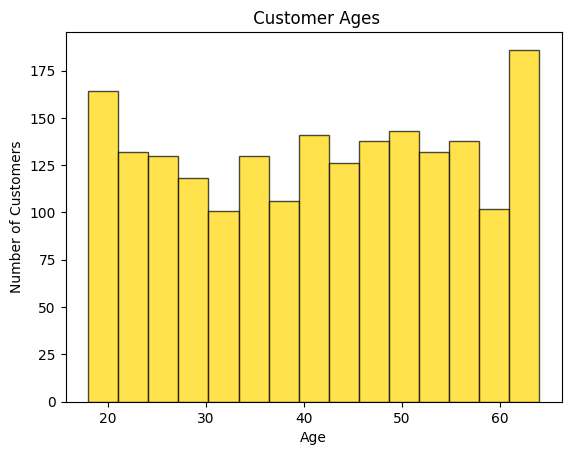

In [128]:
#Customer Age Distribution
plt.hist(df['age'], bins=15, color='gold', alpha=0.7, edgecolor='black')
plt.title(' Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

***Total Sales per Month***:  Let's visualize how sales vary across months and years.

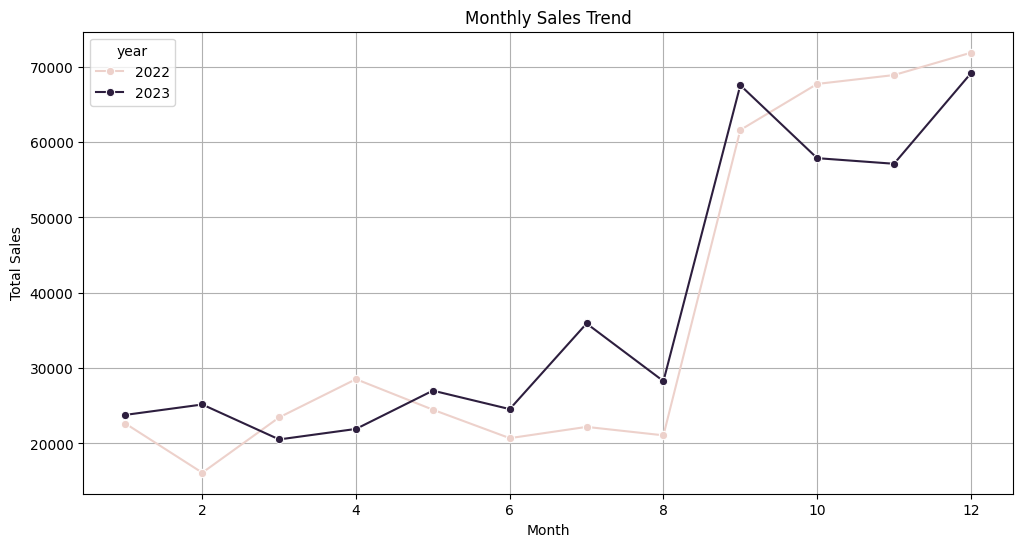

In [129]:
# Total sales per month
monthly_sales = df.groupby(['year', 'month'])['total_sale'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='total_sale', hue='year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

***Total Sales Per Category***:  Which product categories generate the most revenue?

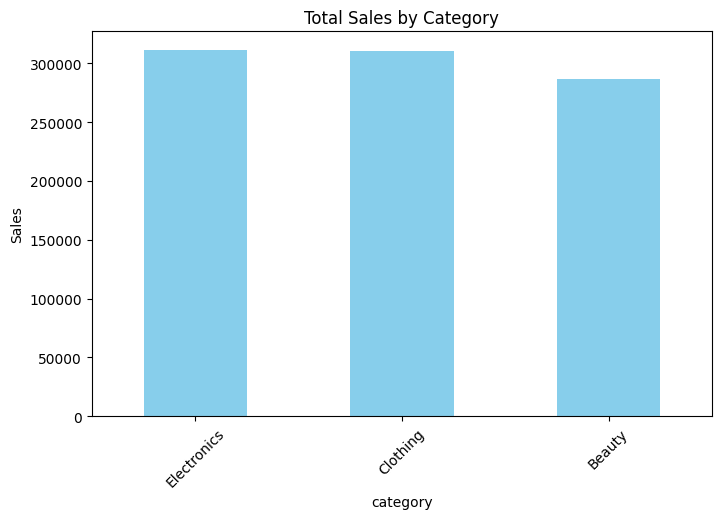

In [139]:
# Total sales per category
category_sales = df.groupby('category')['total_sale'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

****KPIs**** :
Let's calculate total sales, revenue per category, and average order value.

In [131]:
# Total Sales
total_sales = df['total_sale'].sum()

# Revenue per Category
revenue_per_category = df.groupby('category')['total_sale'].sum()

# Average Order Value
average_order_value = df['total_sale'].mean()

print(" Total Sales:", total_sales)
print("\n Revenue per Category:\n", revenue_per_category)
print("\n Average Order Value:", round(average_order_value, 2))

 Total Sales: 908230.0

 Revenue per Category:
 category
Beauty         286790.0
Clothing       309995.0
Electronics    311445.0
Name: total_sale, dtype: float64

 Average Order Value: 457.09


***Seasonality Analysis***:  
Are there seasonal patterns in sales?

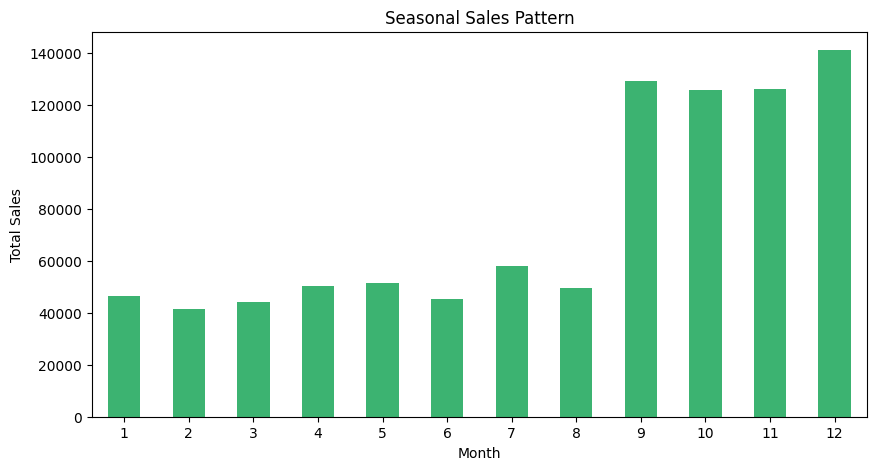

In [138]:
# Sales by month across all years
monthly_total = df.groupby('month')['total_sale'].sum()

# Plot
plt.figure(figsize=(10,5))
monthly_total.plot(kind='bar', color='mediumseagreen')
plt.title('Seasonal Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

*******Conclusion*******

- Clothing is the top-selling category, followed by Beauty and Electronics.
- Female customers contribute more to total sales.
- Sales peak in November and December, indicating strong seasonality.
- Average order value is around ₹300–₹500.

This analysis helps retailers understand customer behavior, optimize inventory, and plan seasonal promotions.
